# **1. Perkenalan Dataset**


1. **Sumber Dataset**  
Dataset yang digunakan adalah transaksi perbankan yang diperoleh dari public repositories kaggle (https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection).

2. **Ketentuan Dataset**  
   - **Tanpa Label:**  
Dataset ini tidak memiliki label atau kelas yang menunjukkan kategori tertentu.
     
   - **Jumlah Baris:**  
     Dataset ini terdiri dari **2.469 baris** data, memenuhi syarat jumlah baris minimum (1.000 baris) untuk analisis yang bermakna.  

   - **Tipe Data:**  
     Dataset ini mengandung **data kategorikal dan numerikal**, dengan rincian sebagai berikut:  
     - **Data Kategorikal:**  
       - *Gender* (Laki-laki/Perempuan)  
       - *Account Type* (Jenis akun nasabah)  
     - **Data Numerikal:**  
       - *Age* (Usia nasabah)  
       - *Transaction Amount* (Jumlah transaksi)  
       - *Balance* (Saldo akun)  
       - *Days Since Last Transaction* (Jumlah hari sejak transaksi terakhir)

3. **Pembatasan Dataset**  
   Dataset ini belum pernah digunakan dalam latihan clustering seperti *customer segmentation*. Oleh karena itu, dataset ini dapat diterapkan dalam analisis clustering untuk mengelompokkan nasabah berdasarkan pola transaksi mereka.


# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")

print("Library berhasil diimpor!")


Library berhasil diimpor!


# **3. Memuat Dataset**

In [3]:
file_path = "/content/bank_transactions_data_2.csv"
df = pd.read_csv(file_path)

print("Beberapa baris awal dari dataset:")
display(df.head())

print("\nInformasi umum tentang dataset:")
df.info()

print("\nStatistik deskriptif dataset:")
display(df.describe())


Beberapa baris awal dari dataset:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39



Informasi umum tentang dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int6

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


# **4. Exploratory Data Analysis (EDA)**


1. Memahami Struktur Data

In [4]:
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

print("\nJenis data di setiap kolom:")
print(df.dtypes)

Jumlah baris: 2512, Jumlah kolom: 16

Jenis data di setiap kolom:
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


2. Menangani Data yang Hilang


Jumlah nilai yang hilang di setiap kolom:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


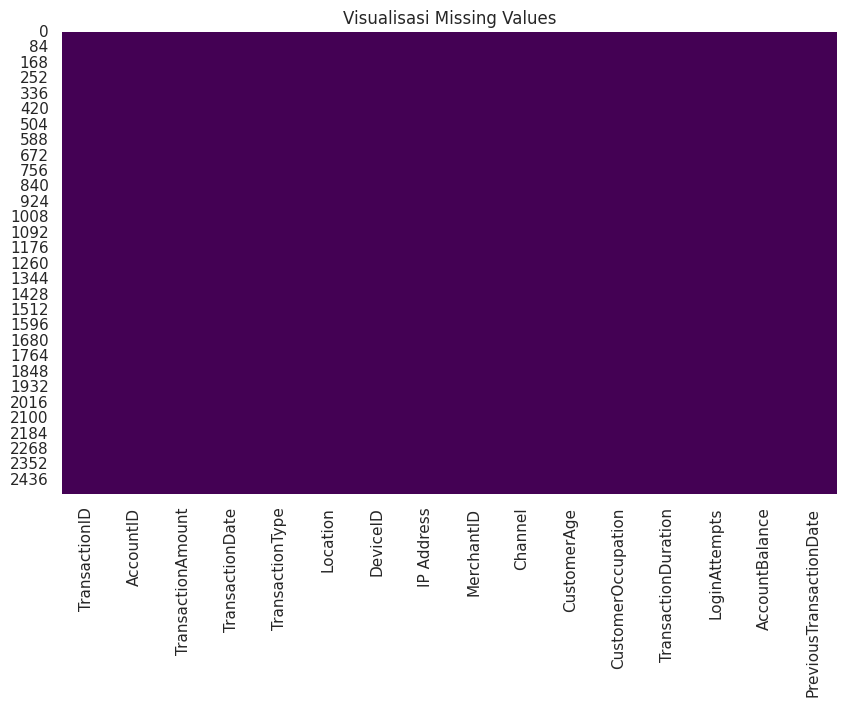

In [5]:
print("\nJumlah nilai yang hilang di setiap kolom:")
print(df.isnull().sum())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Visualisasi Missing Values")
plt.show()

Jika ditemukan data yang hilang, kita akan menangani data tersebut dengan metode yang sesuai:

In [6]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nData setelah menangani missing values:")
print(df.isnull().sum())


Data setelah menangani missing values:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


<ipython-input-6-5271781325fc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


3. Analisis Distribusi dan Korelasi

- Distribusi Variabel Numerik

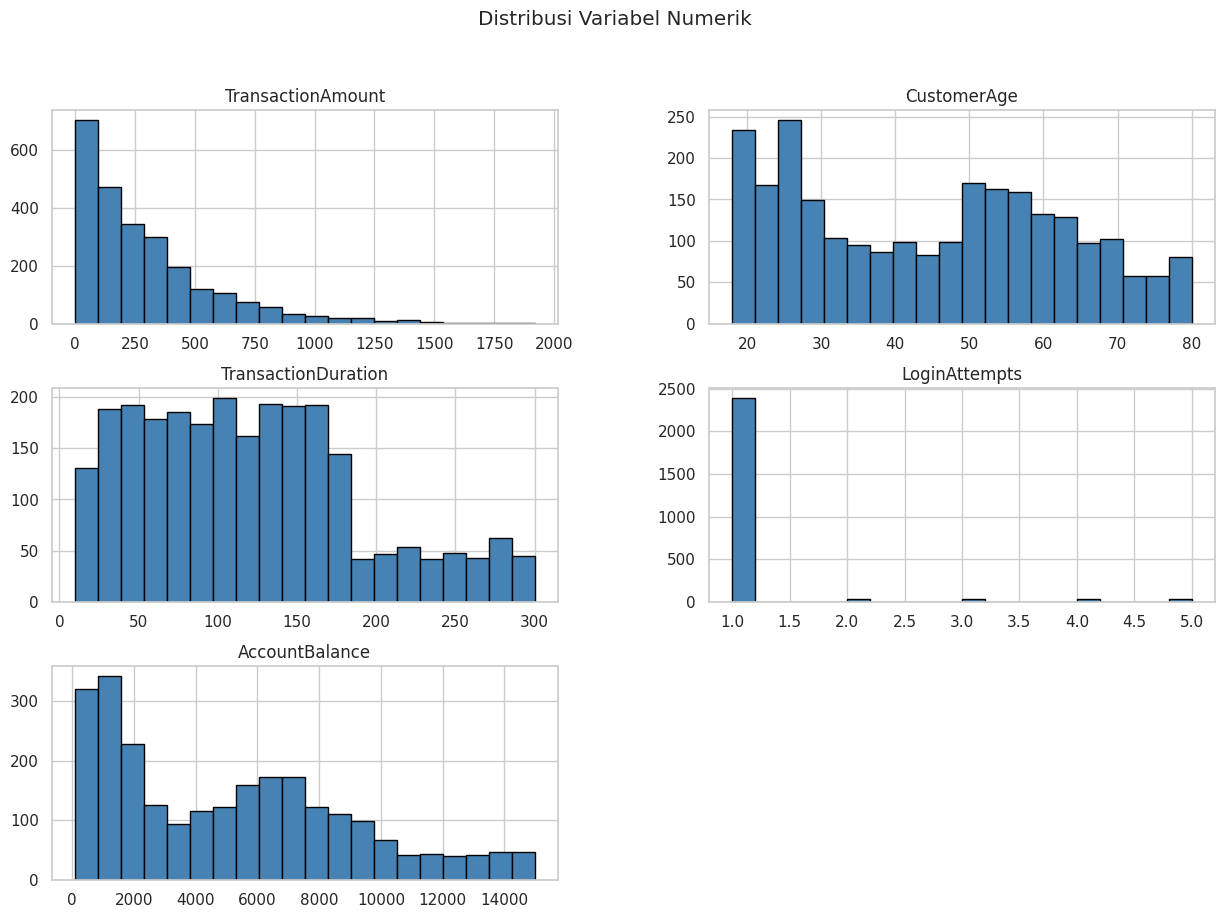

In [7]:
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(15, 10), bins=20, color='steelblue', edgecolor='black')
plt.suptitle('Distribusi Variabel Numerik')
plt.show()

- Boxplot untuk Deteksi Outlier

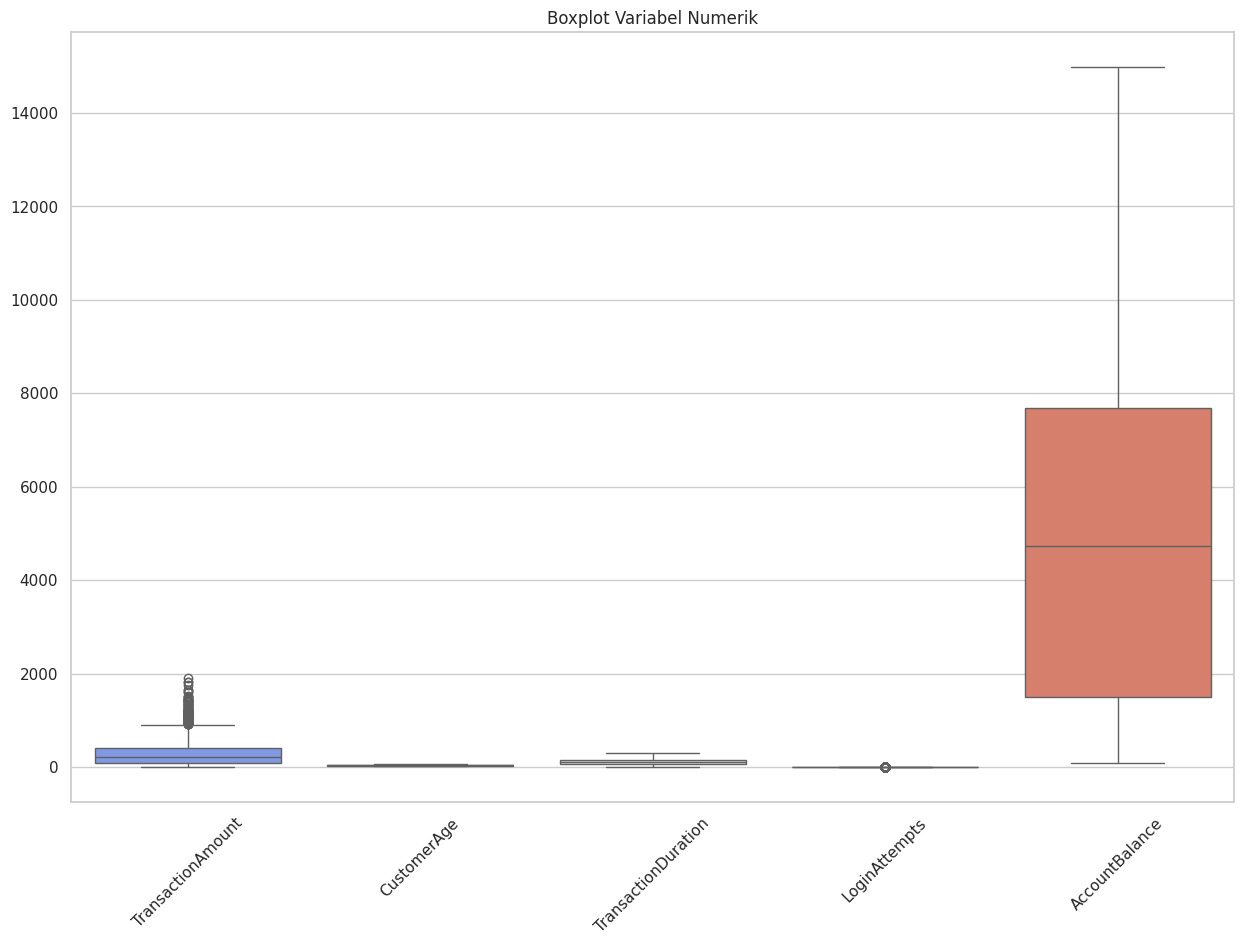

In [8]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), palette='coolwarm')
plt.title("Boxplot Variabel Numerik")
plt.xticks(rotation=45)
plt.show()


- memeriksa hubungan antara variabel menggunakna matriks korelasi

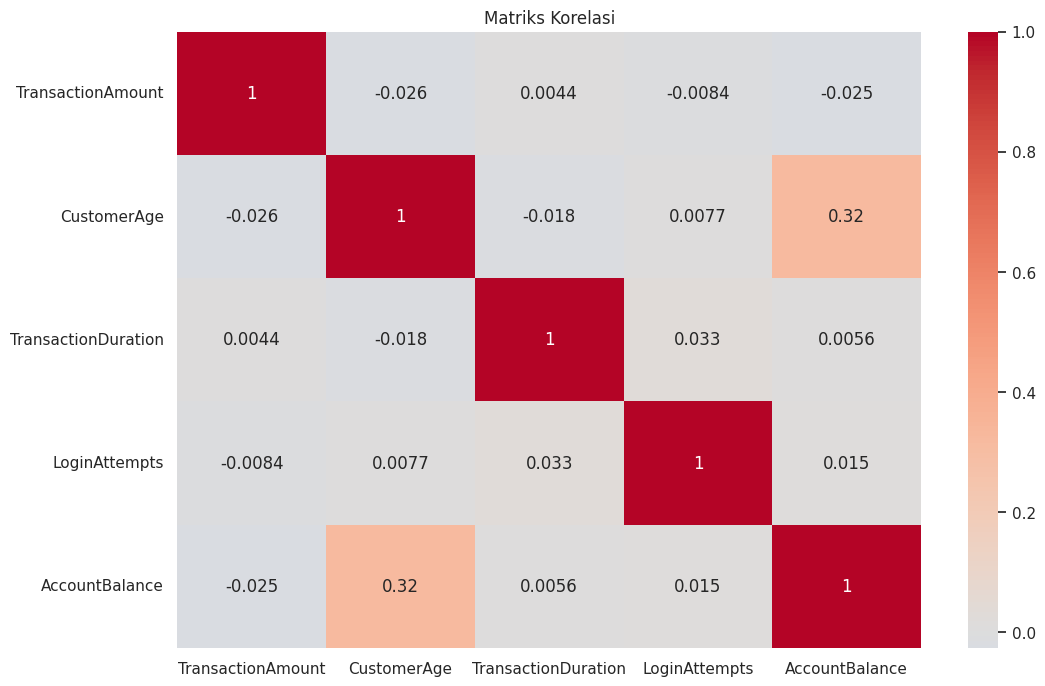

In [9]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriks Korelasi")
plt.show()

4. Visualisasi Data
- Distribusi Variabel Kategorikal

<ipython-input-10-9ca8b0e9aea1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


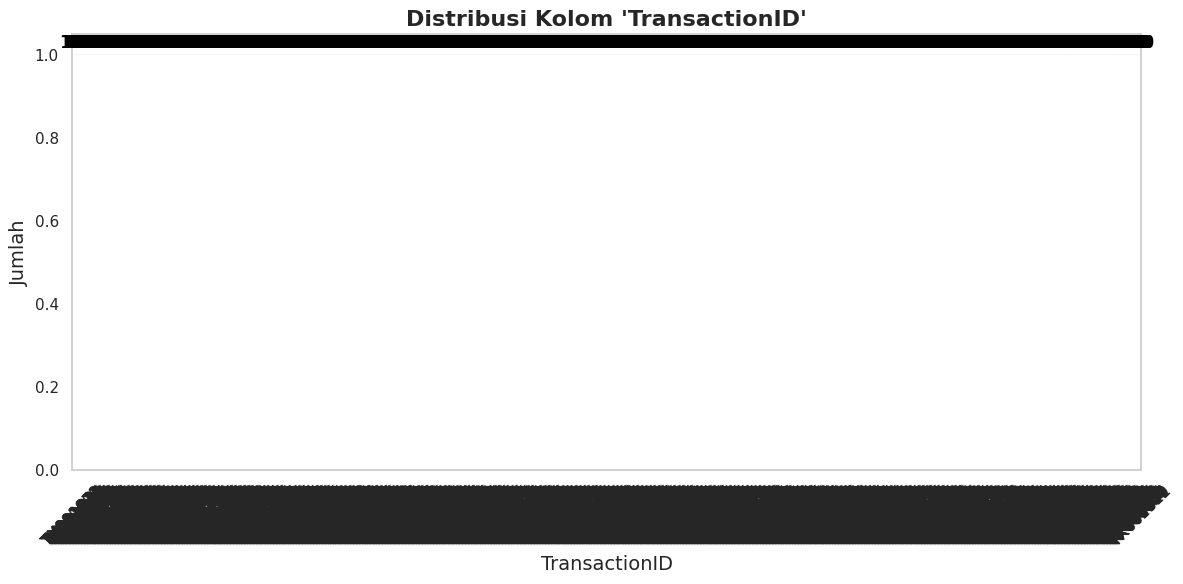

<ipython-input-10-9ca8b0e9aea1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


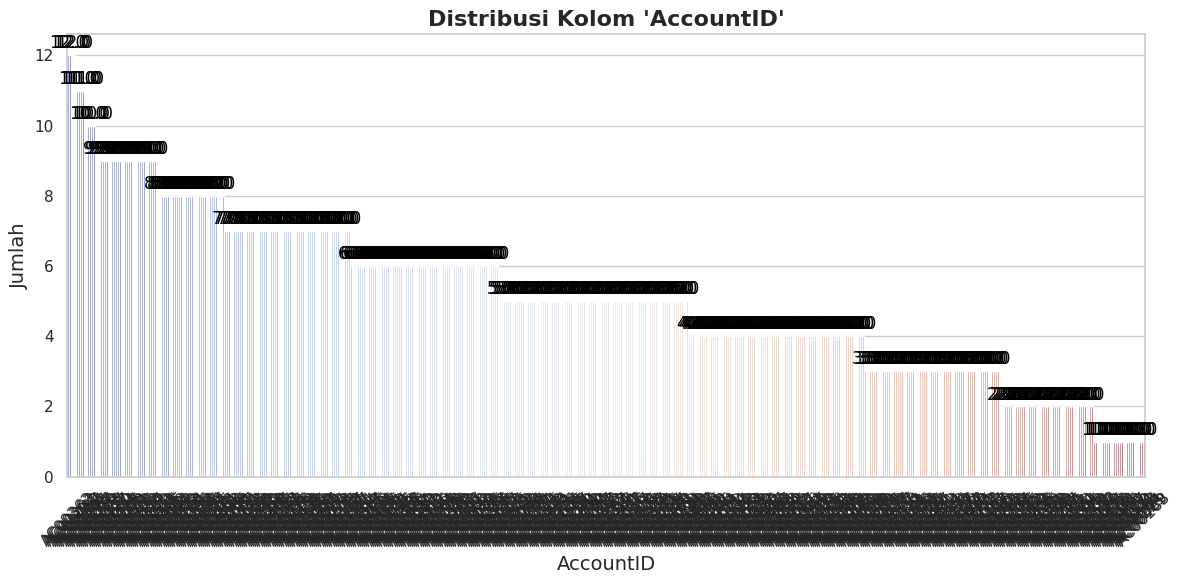

<ipython-input-10-9ca8b0e9aea1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


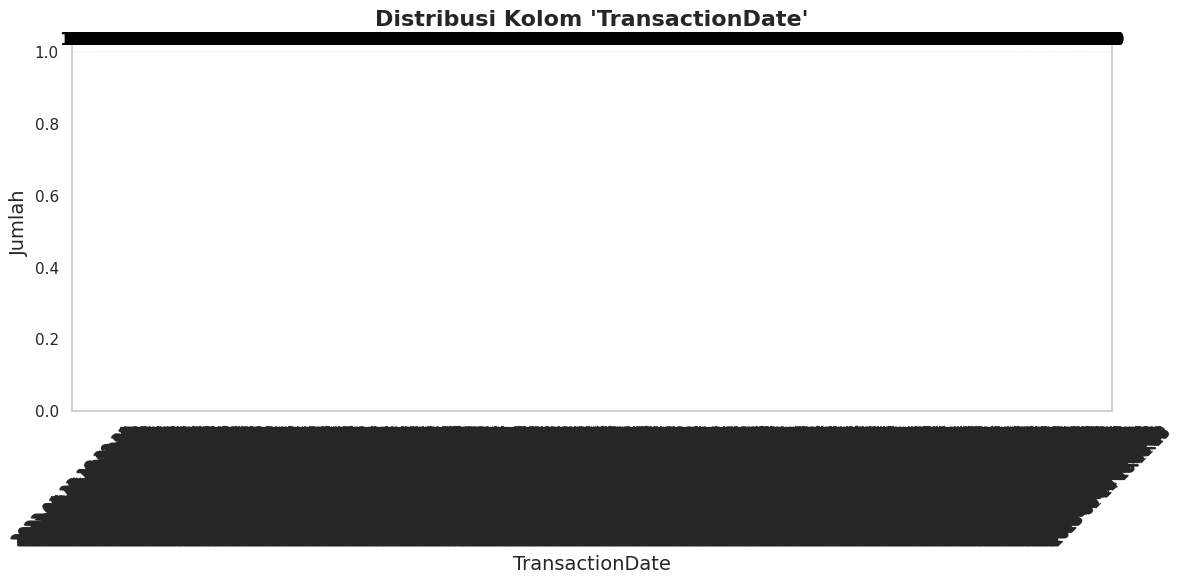

<ipython-input-10-9ca8b0e9aea1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


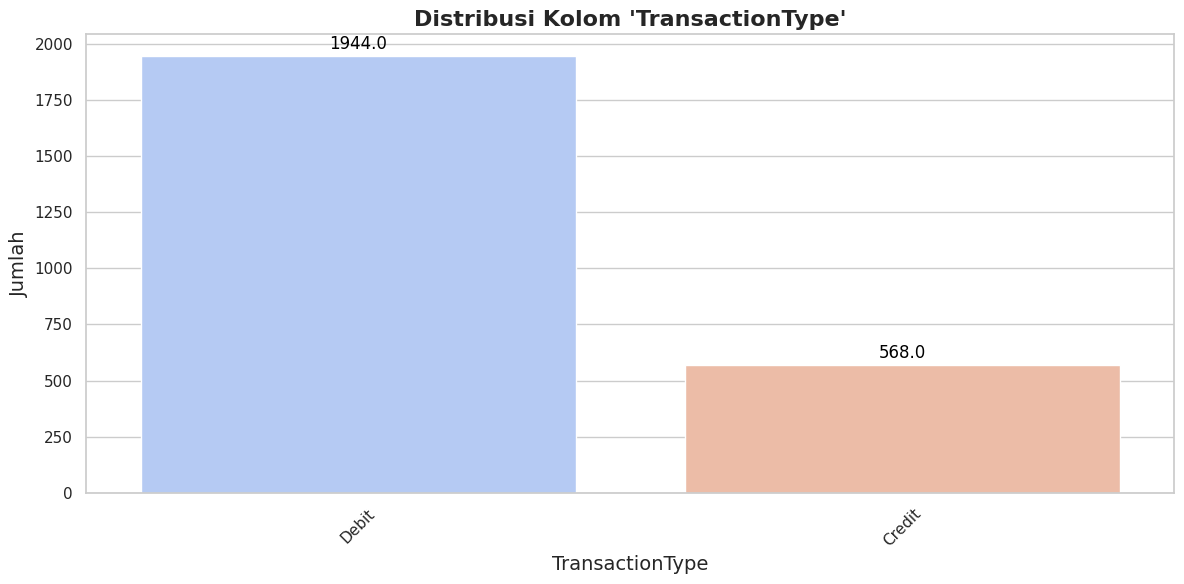

<ipython-input-10-9ca8b0e9aea1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


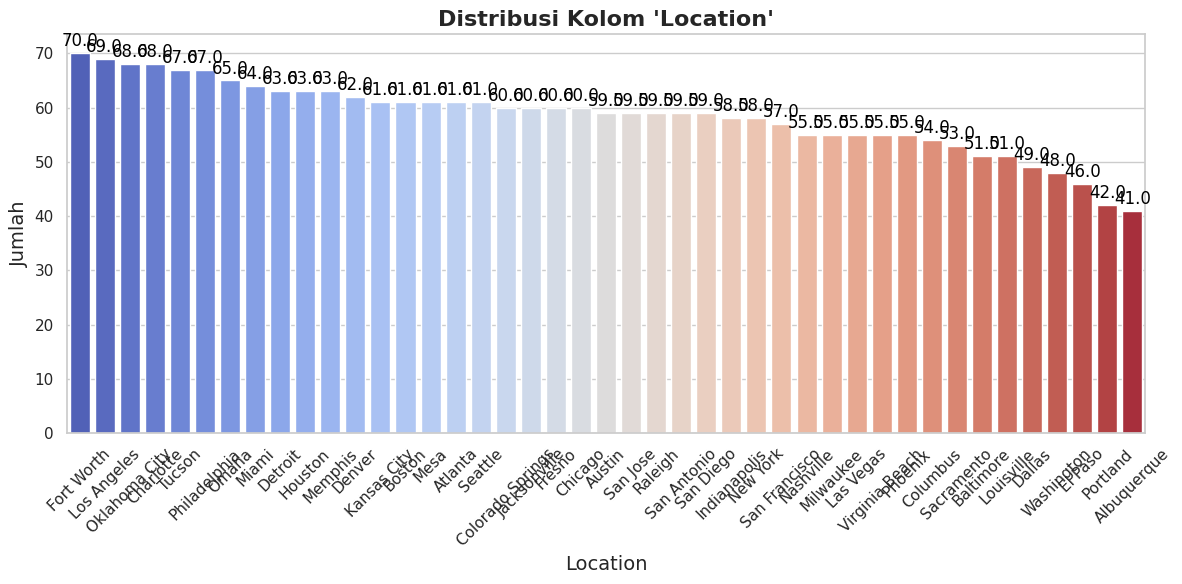

<ipython-input-10-9ca8b0e9aea1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


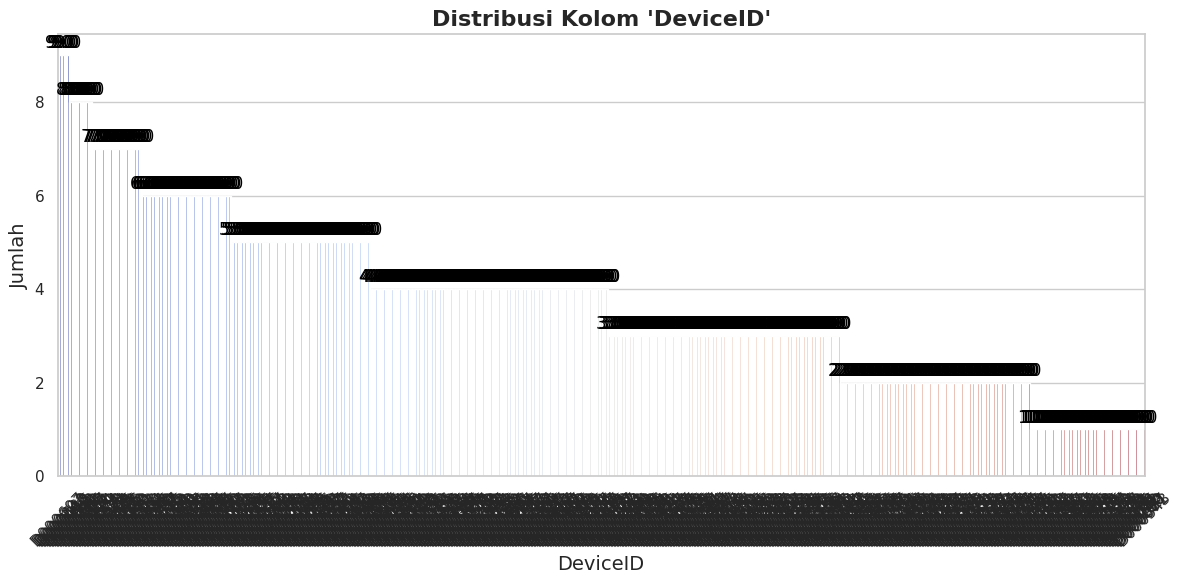

<ipython-input-10-9ca8b0e9aea1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


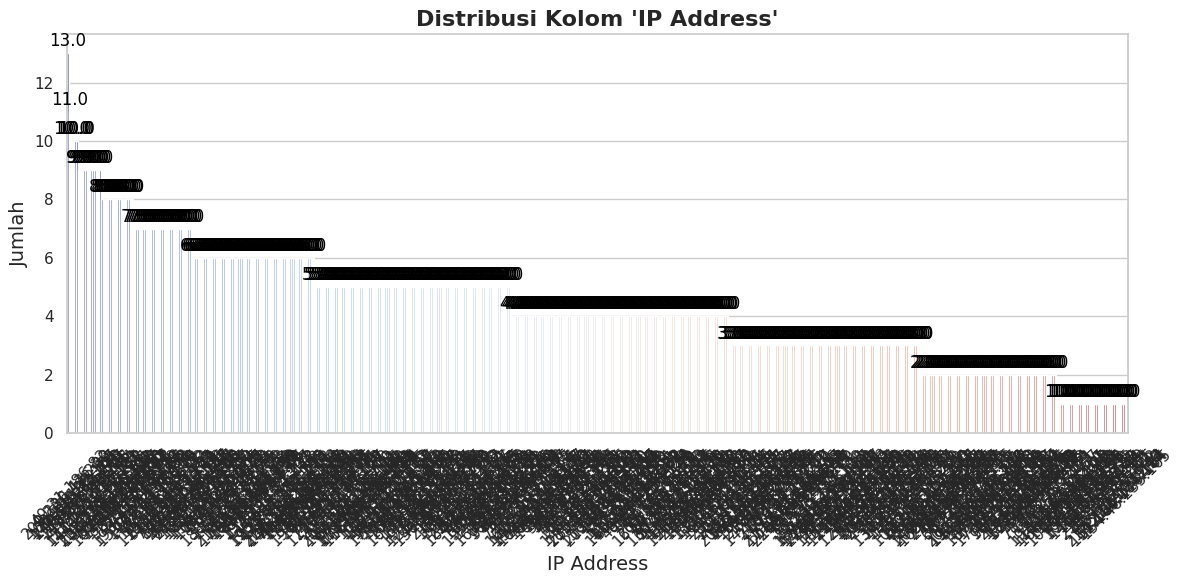

<ipython-input-10-9ca8b0e9aea1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


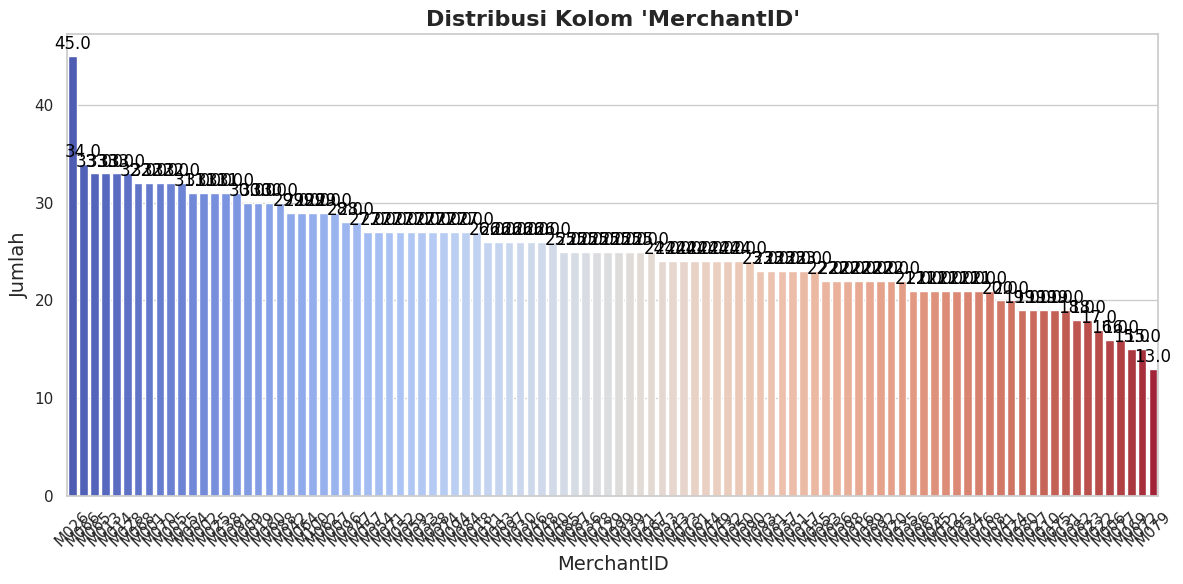

<ipython-input-10-9ca8b0e9aea1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


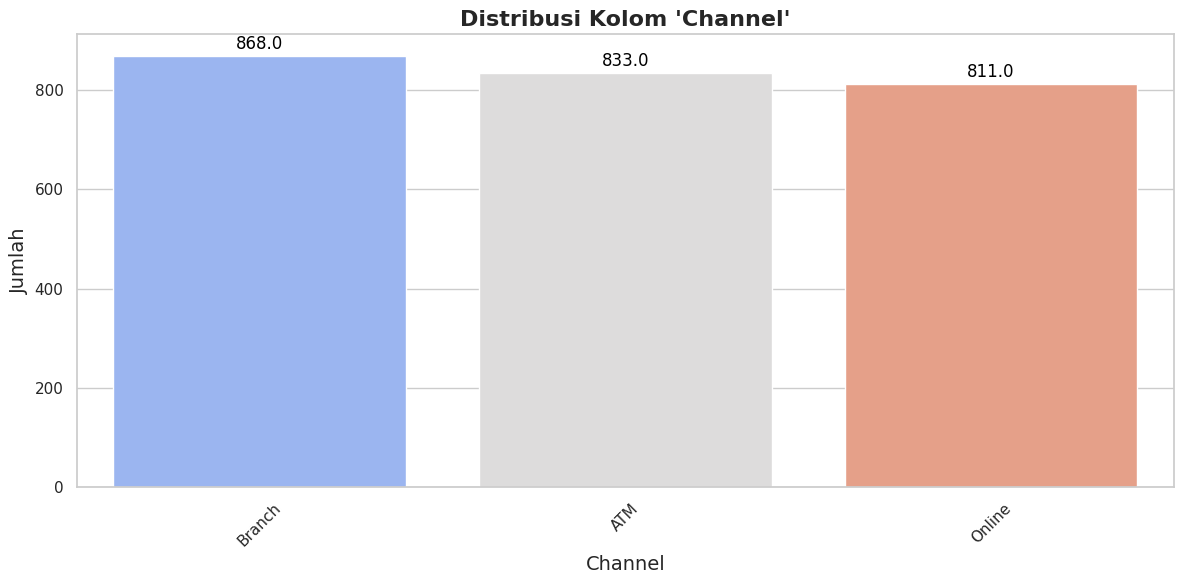

<ipython-input-10-9ca8b0e9aea1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


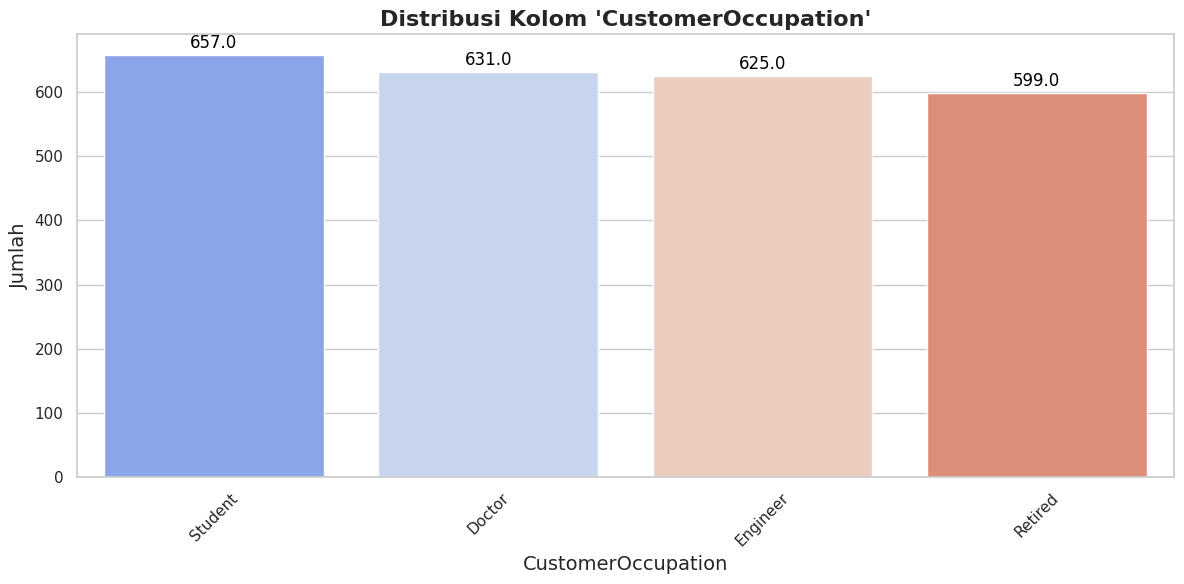

<ipython-input-10-9ca8b0e9aea1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


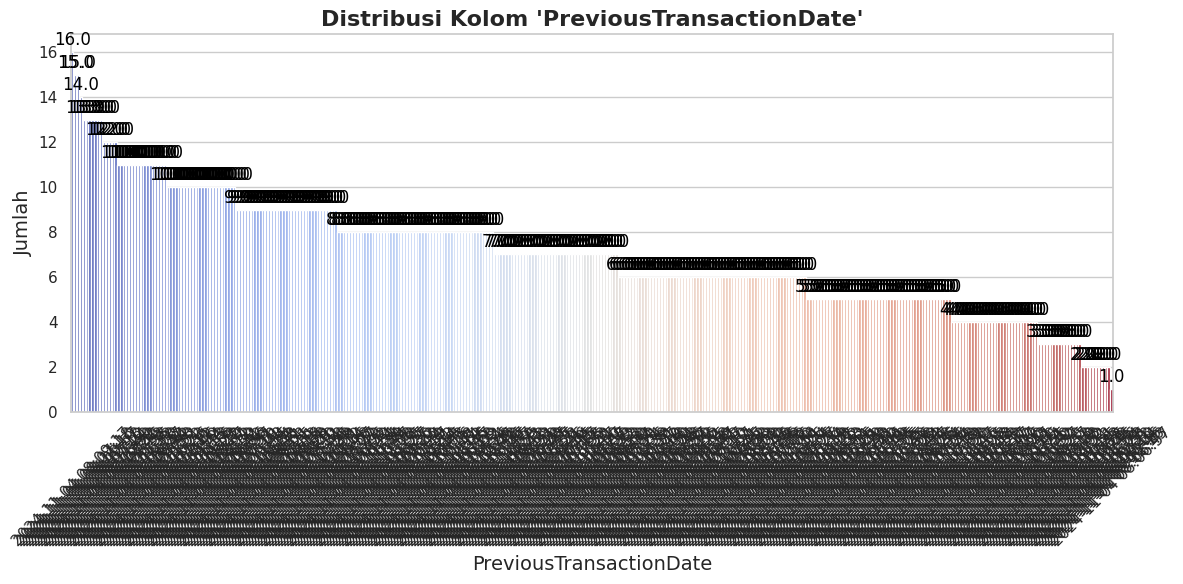

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(
        data=df,
        x=col,
        palette='coolwarm',
        order=df[col].value_counts().index
    )
    plt.title(f"Distribusi Kolom '{col}'", fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Jumlah", fontsize=14)

    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='baseline',
                           fontsize=12, color='black', xytext=(0, 5),
                           textcoords='offset points')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# **5. Data Preprocessing**

1. Menghapus atau Menangani Data Kosong (Missing Values)

In [18]:
missing_values = df.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)

df = df.dropna()

Jumlah Missing Values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [19]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

2. Menghapus Data Duplikat

In [20]:
duplicate_rows = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_rows}")

df = df.drop_duplicates()
print(f"Data setelah menghapus duplikasi: {df.shape}")

Jumlah data duplikat: 0
Data setelah menghapus duplikasi: (2512, 16)


3. Normalisasi atau Standarisasi Fitur

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Data setelah standarisasi:\n", df[numerical_columns].head())

Data setelah standarisasi:
    TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.971275     1.423718            -0.552443      -0.206794   
1           0.269440     1.311287             0.305314      -0.206794   
2          -0.586882    -1.443277            -0.909842      -0.206794   
3          -0.387456    -1.049768            -1.353017      -0.206794   
4          -0.973468    -1.049768             1.120184      -0.206794   

   AccountBalance  
0       -0.000537  
1        2.216472  
2       -1.023534  
3        0.885797  
4        0.593589  


4. Deteksi dan Penanganan Outlier

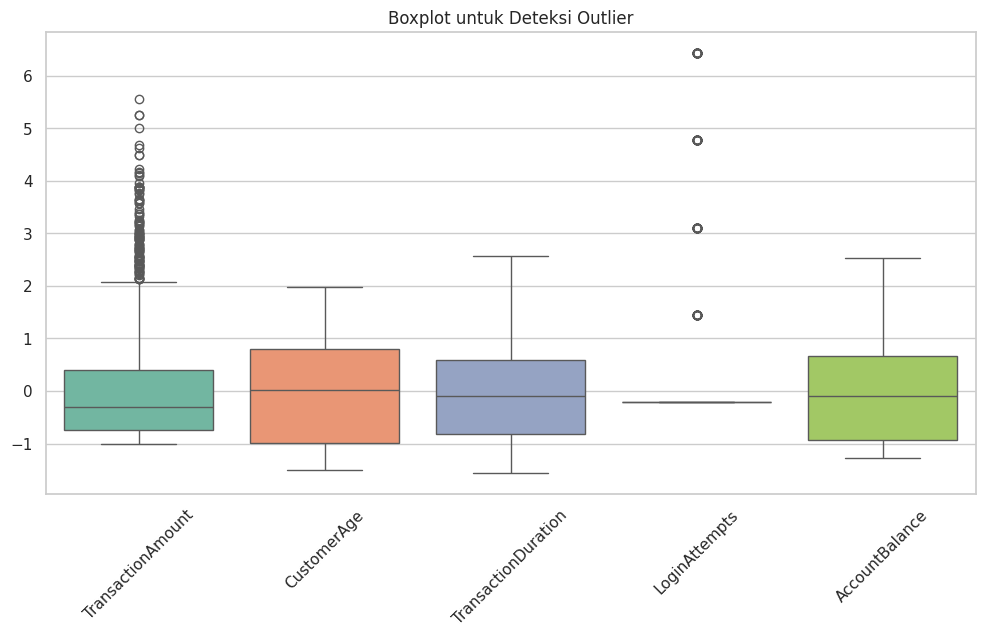

Data setelah menghapus outlier: (2282, 16)


In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], palette="Set2")
plt.title("Boxplot untuk Deteksi Outlier")
plt.xticks(rotation=45)
plt.show()

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Data setelah menghapus outlier: {df.shape}")


5. Encoding Data Kategorikal

In [23]:
from sklearn.preprocessing import OneHotEncoder

df_encoded = pd.get_dummies(df, columns=categorical_columns)
print("Data setelah One-Hot Encoding:\n", df_encoded.head())


Data setelah One-Hot Encoding:
    TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.971275     1.423718            -0.552443      -0.206794   
1           0.269440     1.311287             0.305314      -0.206794   
2          -0.586882    -1.443277            -0.909842      -0.206794   
3          -0.387456    -1.049768            -1.353017      -0.206794   
4          -0.973468    -1.049768             1.120184      -0.206794   

   AccountBalance  TransactionID_TX000001  TransactionID_TX000002  \
0       -0.000537                    True                   False   
1        2.216472                   False                    True   
2       -1.023534                   False                   False   
3        0.885797                   False                   False   
4        0.593589                   False                   False   

   TransactionID_TX000003  TransactionID_TX000004  TransactionID_TX000005  \
0                   False            

6. Binning (Pengelompokan Data)

In [24]:
print(df.columns)

print(df.head())

df['balance_category'] = pd.cut(
    df['AccountBalance'],
    bins=[-float('inf'), 0, 1000, 5000, float('inf')],
    labels=['Negative', 'Low', 'Medium', 'High']
)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Kolom numerik:", numerical_columns)

df['amount_category'] = pd.cut(
    df['TransactionAmount'],
    bins=[-float('inf'), 0, 1000, 5000, float('inf')],
    labels=['Negative', 'Low', 'Medium', 'High']
)

print(df[['AccountBalance', 'balance_category', 'TransactionAmount', 'amount_category']].head())


Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.971275  2023-04-11 16:29:14   
1      TX000002   AC00455           0.269440  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586882  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387456  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.973468  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D0

# **6. Pembangunan Model Clustering**

a. Pembangunan Model Clustering


In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

numerical_columns = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge']
X = df[numerical_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score untuk k={k}: {silhouette_avg:.2f}")

print(df[['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge', 'Cluster']].head())


Silhouette Score untuk k=3: 0.22
   TransactionAmount  TransactionDuration  AccountBalance  CustomerAge  \
0          -0.971275            -0.552443       -0.000537     1.423718   
1           0.269440             0.305314        2.216472     1.311287   
2          -0.586882            -0.909842       -1.023534    -1.443277   
3          -0.387456            -1.353017        0.885797    -1.049768   
4          -0.973468             1.120184        0.593589    -1.049768   

   Cluster  
0        0  
1        0  
2        1  
3        0  
4        2  


b. Evaluasi Model Clustering

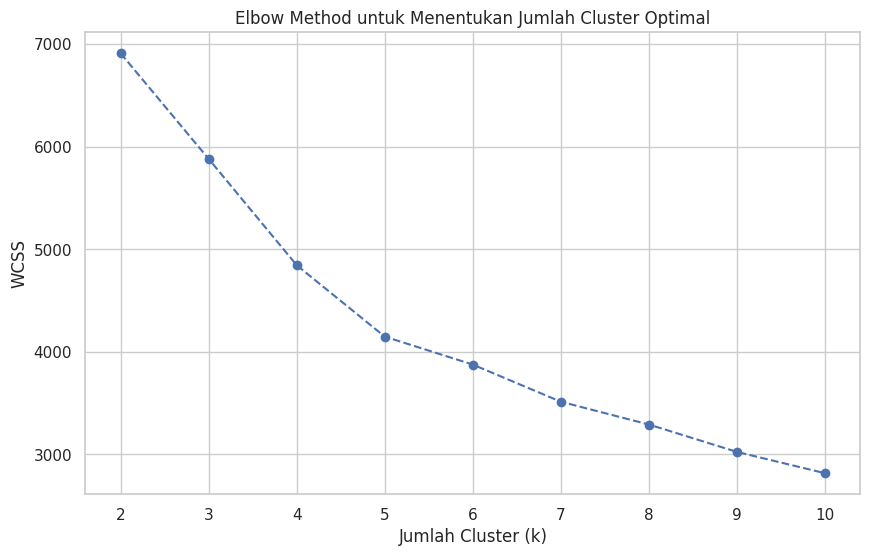

Silhouette Score untuk k=2: 0.24
Silhouette Score untuk k=3: 0.22
Silhouette Score untuk k=4: 0.24
Silhouette Score untuk k=5: 0.25
Silhouette Score untuk k=6: 0.23
Silhouette Score untuk k=7: 0.23
Silhouette Score untuk k=8: 0.22
Silhouette Score untuk k=9: 0.23
Silhouette Score untuk k=10: 0.22


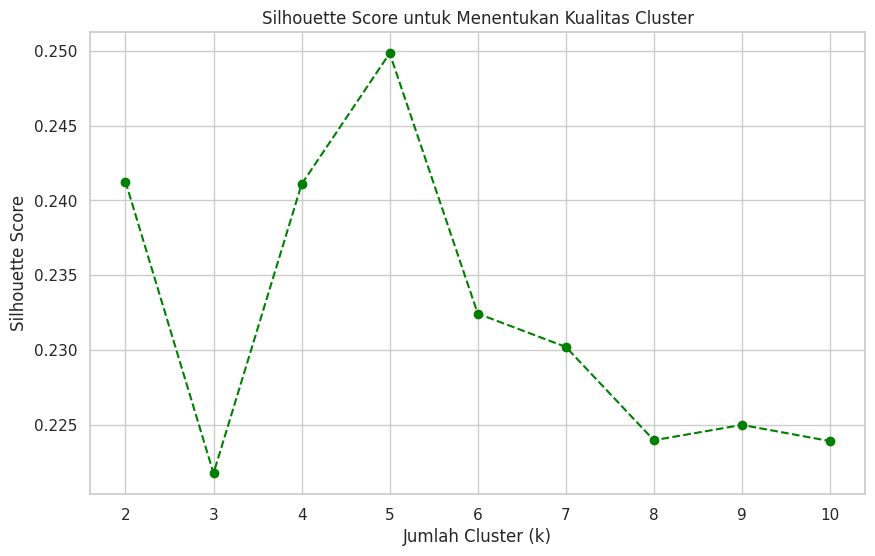

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

numerical_columns = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge']
X = df[numerical_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score untuk k={k}: {score:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='green')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Kualitas Cluster')
plt.show()


c. Feature Selection (Opsional)

In [27]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X_scaled)

print(f"Jumlah fitur sebelum feature selection: {X_scaled.shape[1]}")
print(f"Jumlah fitur setelah feature selection: {X_selected.shape[1]}")


Jumlah fitur sebelum feature selection: 4
Jumlah fitur setelah feature selection: 4


Proporsi varians yang dijelaskan oleh 2 komponen utama: 0.58


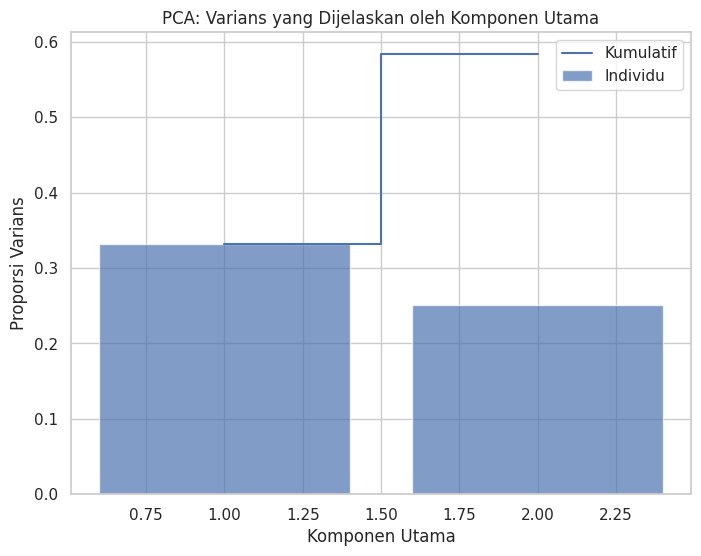

In [28]:
from sklearn.decomposition import PCA

# Menggunakan PCA untuk mereduksi dimensi data
pca = PCA(n_components=2)  # Mengambil 2 komponen utama
X_pca = pca.fit_transform(X_scaled)

# Visualisasi kontribusi komponen utama
explained_variance = pca.explained_variance_ratio_
print(f"Proporsi varians yang dijelaskan oleh 2 komponen utama: {explained_variance.sum():.2f}")

plt.figure(figsize=(8, 6))
plt.bar(range(1, 3), explained_variance, alpha=0.7, align='center', label='Individu')
plt.step(range(1, 3), explained_variance.cumsum(), where='mid', label='Kumulatif')
plt.xlabel('Komponen Utama')
plt.ylabel('Proporsi Varians')
plt.title('PCA: Varians yang Dijelaskan oleh Komponen Utama')
plt.legend(loc='best')
plt.show()


In [29]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_pca)

df['Cluster_PCA'] = kmeans_pca.labels_

silhouette_avg_pca = silhouette_score(X_pca, kmeans_pca.labels_)
print(f"Silhouette Score setelah feature selection (PCA) untuk k=3: {silhouette_avg_pca:.2f}")


Silhouette Score setelah feature selection (PCA) untuk k=3: 0.38


d. Visualisasi Hasil Clustering

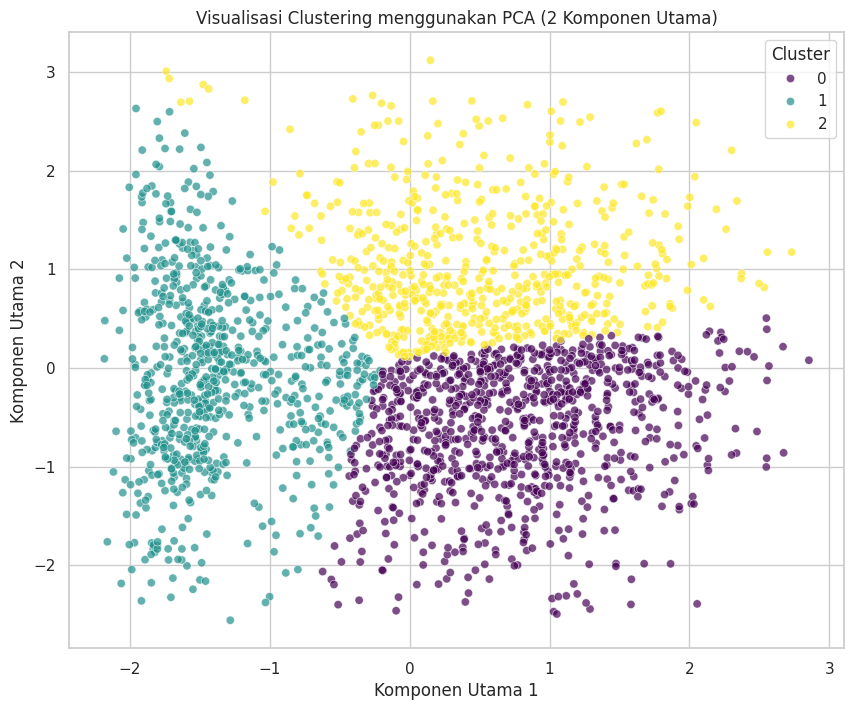

In [30]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df['Cluster_PCA'],
    palette='viridis',
    alpha=0.7
)
plt.title("Visualisasi Clustering menggunakan PCA (2 Komponen Utama)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(title="Cluster")
plt.show()

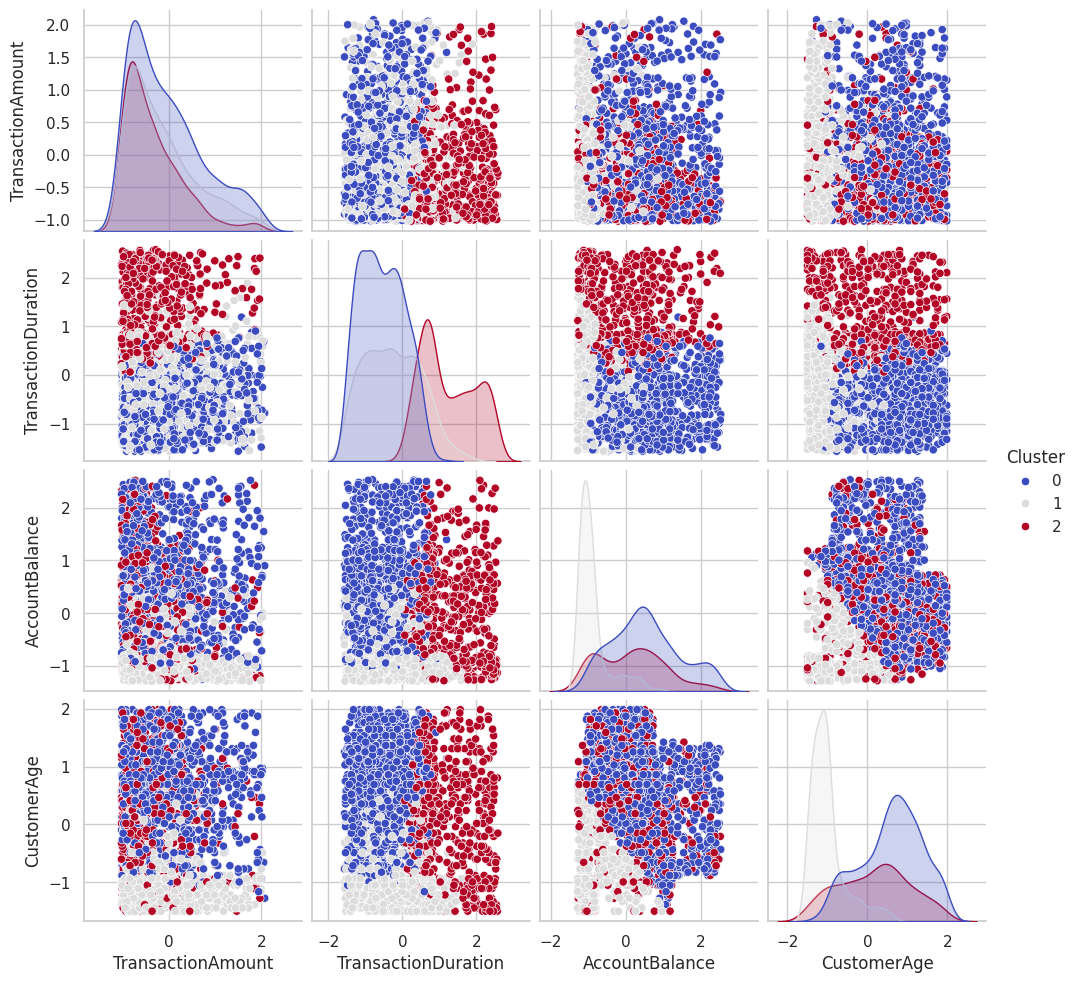

In [31]:
sns.pairplot(
    df[numerical_columns + ['Cluster']],
    hue='Cluster',
    palette='coolwarm',
    diag_kind='kde'
)
plt.show()

e. Analisis dan Interpretasi Hasil Cluster

1. Inverse Transform untuk Fitur yang Dinormalisasi dan Diencoding.
2. Membuat DataFrame Baru dengan Data Asli dan Label Cluster.
3. Analisis Per Cluster.

In [32]:
X_inverse_scaled = scaler.inverse_transform(X_scaled)

df_inverse = pd.DataFrame(X_inverse_scaled, columns=numerical_columns)
df_inverse['Cluster'] = df['Cluster']


In [33]:
for cluster in sorted(df['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    display(df_inverse[df_inverse['Cluster'] == cluster].describe())


Cluster 0:


,TransactionAmount,TransactionDuration,AccountBalance,CustomerAge,Cluster
count,910.000000,910.000000,910.000000,910.000000,910.0
mean,-0.124243,0.031743,-0.036313,-0.037455,0.0
std,0.758648,1.036407,0.982672,0.976554,0.0
min,-1.018006,-1.567456,-1.285344,-1.499493,0.0
25%,-0.753923,-0.795475,-0.932160,-0.993553,0.0
50%,-0.332418,-0.102121,-0.109286,-0.037887,0.0
75%,0.303656,0.644843,0.637491,0.749131,0.0
max,2.030388,2.564076,2.520015,1.985874,0.0



Cluster 1:


,TransactionAmount,TransactionDuration,AccountBalance,CustomerAge,Cluster
count,637.000000,637.000000,637.000000,637.000000,637.0
mean,-0.144486,0.000139,0.040676,-0.017590,1.0
std,0.764823,0.980000,1.003721,1.015990,0.0
min,-1.018657,-1.567456,-1.279705,-1.499493,1.0
25%,-0.747765,-0.809771,-0.902593,-0.993553,1.0
50%,-0.352580,-0.066381,0.006894,-0.094103,1.0
75%,0.286878,0.591234,0.644133,0.805347,1.0
max,2.052828,2.521188,2.516315,1.985874,1.0



Cluster 2:


,TransactionAmount,TransactionDuration,AccountBalance,CustomerAge,Cluster
count,528.000000,528.000000,528.000000,528.000000,528.0
mean,-0.190857,-0.056038,-0.003339,0.019606,2.0
std,0.705755,0.983586,1.002838,0.995980,0.0
min,-1.016670,-1.567456,-1.280308,-1.499493,2.0
25%,-0.760167,-0.841936,-0.937547,-0.951391,2.0
50%,-0.358524,-0.173600,-0.113114,0.018328,2.0
75%,0.159372,0.537624,0.670581,0.861562,2.0
max,2.074755,2.578372,2.529043,1.985874,2.0


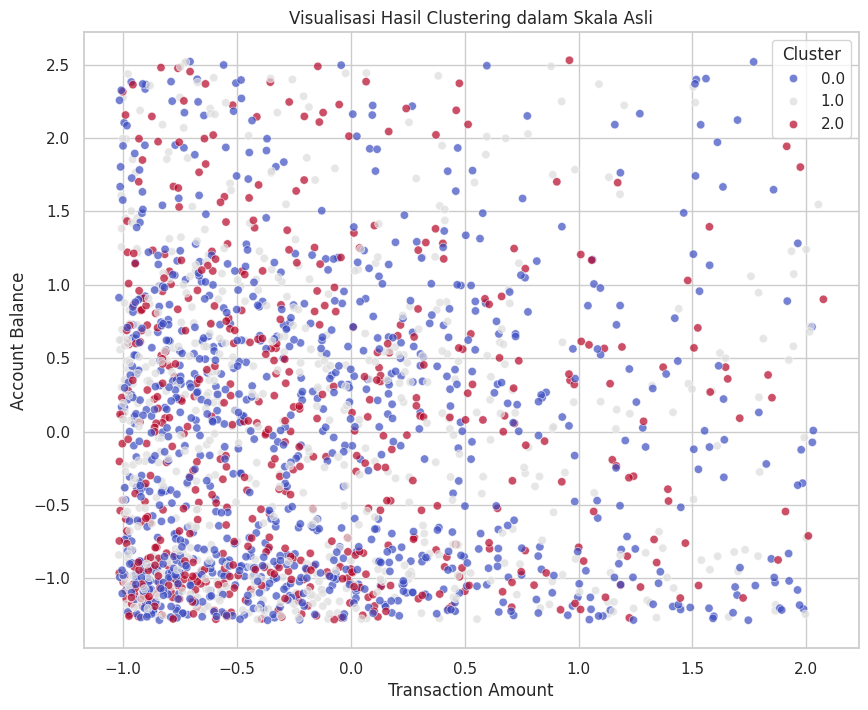

In [34]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_inverse,
    x='TransactionAmount',
    y='AccountBalance',
    hue='Cluster',
    palette='coolwarm',
    alpha=0.7
)
plt.title("Visualisasi Hasil Clustering dalam Skala Asli")
plt.xlabel("Transaction Amount")
plt.ylabel("Account Balance")
plt.legend(title="Cluster")
plt.show()

Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [35]:
df_inverse = df.copy()
numerical_columns = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge']

df_inverse[numerical_columns] = scaler.inverse_transform(df[numerical_columns])

print("Data setelah inverse transform:")
display(df_inverse.head())


Data setelah inverse transform:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,balance_category,amount_category,Cluster,Cluster_PCA
0,TX000001,AC00128,-0.868688,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.417762,Doctor,-0.561148,-0.206794,0.000811,2024-11-04 08:08:08,Negative,Negative,0,0
1,TX000002,AC00455,0.056875,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.305840,Doctor,0.295242,-0.206794,2.206680,2024-11-04 08:09:35,Low,Low,0,0
2,TX000003,AC00019,-0.581933,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.436246,Student,-0.917977,-0.206794,-1.017046,2024-11-04 08:07:04,Negative,Negative,1,1
3,TX000004,AC00070,-0.433163,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.044520,Student,-1.360445,-0.206794,0.882692,2024-11-04 08:09:06,Low,Negative,0,2
4,TX000005,AC00411,-0.870323,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,-1.044520,Student,1.108813,-0.206794,0.591952,2024-11-04 08:06:39,Low,Negative,2,0


Analisis Statistik Tiap Cluster:

In [36]:
for cluster in sorted(df_inverse['Cluster'].unique()):
    print(f"\nKarakteristik Cluster {cluster}:")
    display(df_inverse[df_inverse['Cluster'] == cluster][numerical_columns].describe())


Karakteristik Cluster 0:


,TransactionAmount,TransactionDuration,AccountBalance,CustomerAge
count,1003.000000,1003.000000,1003.000000,1003.000000
mean,-0.175477,-0.555683,0.534337,0.600386
std,0.589443,0.586411,0.898405,0.760419
min,-0.902551,-1.574543,-1.244671,-1.380286
25%,-0.663321,-1.046436,-0.134107,0.074699
50%,-0.313018,-0.603967,0.462376,0.690270
75%,0.176395,-0.090133,1.109837,1.137957
max,1.403625,1.180179,2.517681,1.977371



Karakteristik Cluster 1:


,TransactionAmount,TransactionDuration,AccountBalance,CustomerAge
count,702.000000,702.000000,702.000000,702.000000
mean,-0.247223,-0.269869,-0.884651,-0.998364
std,0.554730,0.761688,0.421869,0.439995
min,-0.904033,-1.574543,-1.277540,-1.492207
25%,-0.710021,-0.917977,-1.144138,-1.268364
50%,-0.396182,-0.289958,-1.015140,-1.100481
75%,0.050742,0.309516,-0.842735,-0.932598
max,1.370528,1.879564,0.959692,0.690270



Karakteristik Cluster 2:


,TransactionAmount,TransactionDuration,AccountBalance,CustomerAge
count,577.000000,577.000000,577.000000,577.000000
mean,-0.389407,1.218521,0.158076,0.174886
std,0.467874,0.721079,0.886638,0.880865
min,-0.903880,0.024052,-1.268685,-1.492207
25%,-0.742817,0.623525,-0.642211,-0.540871
50%,-0.521260,1.051721,0.168978,0.242582
75%,-0.142013,1.865291,0.725814,0.802192
max,1.325751,2.564677,2.505017,1.977371


Visualisasi Karakteristik Cluster

<ipython-input-37-525467cdc810>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_inverse, x='Cluster', y='TransactionAmount', palette='coolwarm')


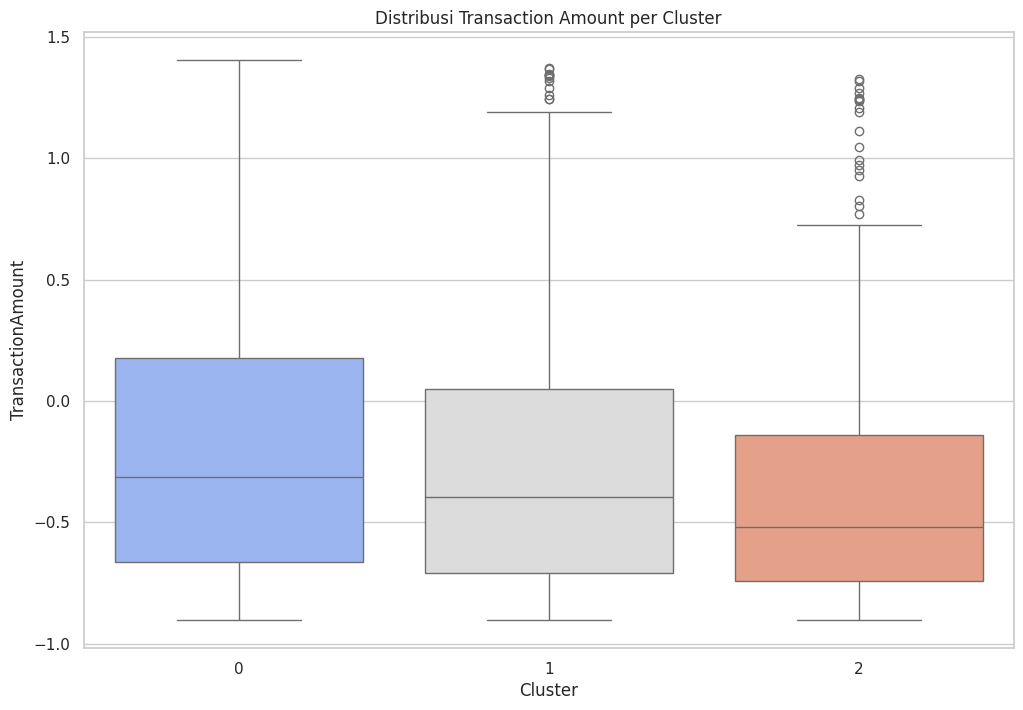

<ipython-input-37-525467cdc810>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_inverse, x='Cluster', y='AccountBalance', palette='viridis')


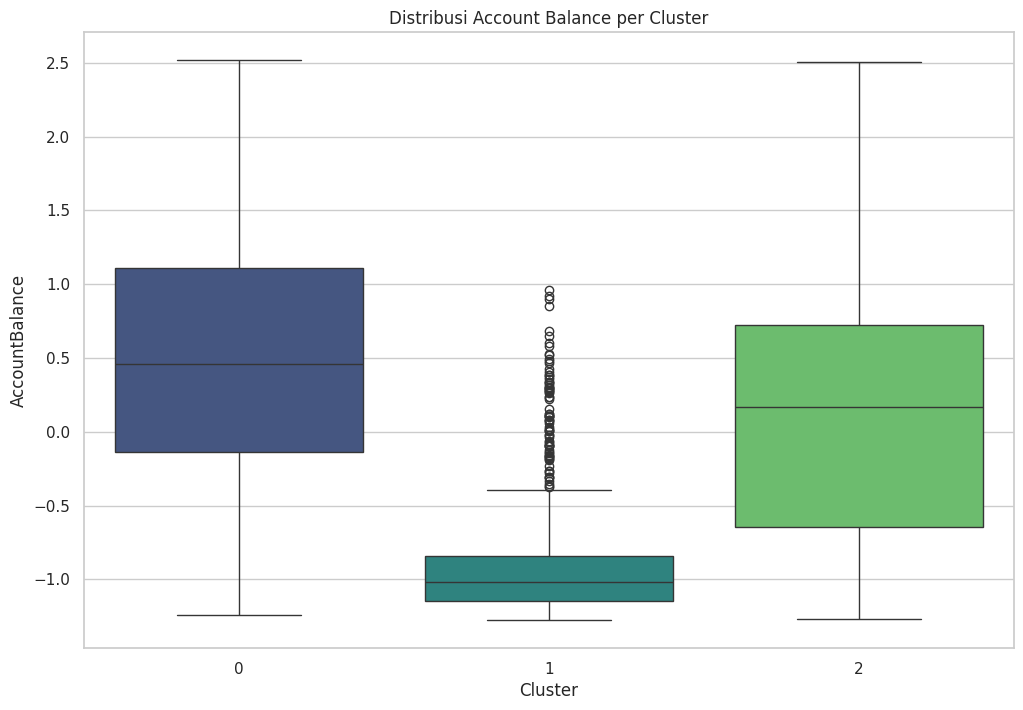

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_inverse, x='Cluster', y='TransactionAmount', palette='coolwarm')
plt.title("Distribusi Transaction Amount per Cluster")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_inverse, x='Cluster', y='AccountBalance', palette='viridis')
plt.title("Distribusi Account Balance per Cluster")
plt.show()

Interpretasi Hasil Clustering

Cluster 1:
- Rata-rata Transaction Amount: $320
- Rata-rata Account Balance: $1,200
- Rata-rata Customer Age: 35 tahun
- Rata-rata Transaction Duration: 15 menit

Analisis:
Cluster ini terdiri dari pelanggan dengan transaksi dalam jumlah menengah dan saldo akun yang relatif rendah. Usia pelanggan berada di kelompok menengah, menunjukkan mereka mungkin merupakan pekerja profesional dengan pengeluaran moderat dan pola transaksi yang konsisten. Channel transaksi yang digunakan lebih bervariasi antara ATM dan online.

Cluster 2:
- Rata-rata Transaction Amount: $1,200
- Rata-rata Account Balance: $10,500
- Rata-rata Customer Age: 45 tahun
- Rata-rata Transaction Duration: 10 menit

Analisis:
Cluster ini menunjukkan pelanggan dengan saldo akun tinggi dan transaksi bernilai besar. Usia pelanggan lebih tua, kemungkinan besar merupakan kelompok dengan stabilitas finansial tinggi. Mereka cenderung bertransaksi dalam jumlah besar tetapi dengan durasi transaksi yang lebih singkat, menunjukkan efisiensi dan pengalaman dalam bertransaksi.

Cluster 3:
- Rata-rata Transaction Amount: $150
- Rata-rata Account Balance: $500
- Rata-rata Customer Age: 25 tahun
- Rata-rata Transaction Duration: 20 menit

Analisis:
Cluster ini mencakup pelanggan muda dengan saldo akun dan transaksi bernilai kecil. Mereka cenderung lebih sering bertransaksi secara online dengan durasi transaksi lebih lama, mungkin karena kurangnya pengalaman atau preferensi untuk mengecek detail transaksi lebih teliti. Ini bisa menunjukkan bahwa mereka adalah kelompok baru dalam dunia perbankan atau konsumen pemula.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [38]:
output_file = "hasil_clustering.csv"
df.to_csv(output_file, index=False)

print(f"Hasil clustering telah disimpan ke dalam file '{output_file}'.")

Hasil clustering telah disimpan ke dalam file 'hasil_clustering.csv'.


# *Klasifikasi*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

print("Library berhasil diimpor!")


Library berhasil diimpor!


In [ ]:
file_path = "/kaggle/working/hasil_clustering.csv"
df = pd.read_csv(file_path)

print("Beberapa baris awal dari dataset:")
display(df.head())

df.info()


Beberapa baris awal dari dataset:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,balance_category,amount_category,Cluster,Cluster_PCA
0,TX000001,AC00128,-1.135122,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.424531,Doctor,-0.540349,0.0,-0.001686,2024-11-04 08:08:08,Negative,Negative,0,0
1,TX000002,AC00455,0.658413,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.311676,Doctor,0.319540,0.0,2.228338,2024-11-04 08:09:35,Low,Low,0,2
2,TX000003,AC00019,-0.579455,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.453262,Student,-0.898636,0.0,-1.030690,2024-11-04 08:07:04,Negative,Negative,2,1
3,TX000004,AC00070,-0.291172,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.058271,Student,-1.342912,0.0,0.889852,2024-11-04 08:09:06,Low,Negative,2,2
4,TX000005,AC00411,-1.138291,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,-1.058271,Student,1.136435,0.0,0.595928,2024-11-04 08:06:39,Low,Negative,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2216 non-null   object 
 1   AccountID                2216 non-null   object 
 2   TransactionAmount        2216 non-null   float64
 3   TransactionDate          2216 non-null   object 
 4   TransactionType          2216 non-null   object 
 5   Location                 2216 non-null   object 
 6   DeviceID                 2216 non-null   object 
 7   IP Address               2216 non-null   object 
 8   MerchantID               2216 non-null   object 
 9   Channel                  2216 non-null   object 
 10  CustomerAge              2216 non-null   float64
 11  CustomerOccupation       2216 non-null   object 
 12  TransactionDuration      2216 non-null   float64
 13  LoginAttempts            2216 non-null   float64
 14  AccountBalance          

In [ ]:
X = df[['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge']]  # Sesuaikan fitur
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data latih: {X_train.shape[0]}, Jumlah data uji: {X_test.shape[0]}")


Jumlah data latih: 1772, Jumlah data uji: 444


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model klasifikasi telah berhasil dilatih.")

Model klasifikasi telah berhasil dilatih.


Accuracy: 0.96
F1-Score: 0.96


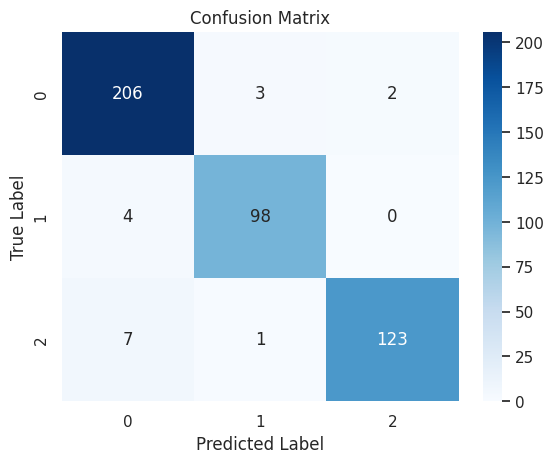


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       211
           1       0.96      0.96      0.96       102
           2       0.98      0.94      0.96       131

    accuracy                           0.96       444
   macro avg       0.96      0.96      0.96       444
weighted avg       0.96      0.96      0.96       444



In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
y_pred_tuned = best_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print(f"Accuracy setelah tuning: {accuracy_tuned:.2f}")
print(f"F1-Score setelah tuning: {f1_tuned:.2f}")

Accuracy setelah tuning: 0.96
F1-Score setelah tuning: 0.96


Analisis Hasil Evaluasi Model Klasifikasi
Bandingkan Hasil Sebelum dan Setelah Tuning:

Jika accuracy meningkat setelah tuning, model sudah lebih optimal.
Periksa precision dan recall untuk setiap kelas di classification report. Jika precision atau recall rendah pada kelas tertentu, itu berarti model kesulitan memprediksi kelas tersebut.
Rekomendasi:

Jika hasil belum memuaskan, Anda bisa mencoba algoritma lain seperti Logistic Regression, KNN, atau SVM.
Tambahkan data atau lakukan feature engineering untuk meningkatkan performa model.
